## Bonus (lab-supervised-learning)

In [1]:
#Import your libraries:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Datframe import
website_dummy = pd.read_csv('./website_dummy.csv')
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,16,7,7,0,2,700,9,10,1153,832,...,0,0,1,0,0,0,0,0,0,1
1,16,6,17,7,4,1230,17,19,1265,1230,...,0,1,0,0,0,0,0,0,0,0
2,16,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,17,6,31,22,3,3812,39,37,18784,4380,...,0,0,0,0,0,0,0,0,0,1
4,17,6,57,2,5,4278,61,62,129889,4586,...,0,1,0,0,0,0,0,0,1,0


In [3]:
#Dataframe statistics
website_dummy.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1.779000e+03,1779.000000,1779.000000,1.779000e+03,1.779000e+03,...,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,56.931422,11.109612,16.268690,5.476672,3.060708,2.984960e+03,18.550309,18.762226,1.591004e+04,3.158414e+03,...,0.003935,0.378865,0.075323,0.087128,0.213041,0.000562,0.000562,0.111298,0.283305,0.244519
std,27.550441,4.551519,40.522693,21.819277,3.388713,5.608203e+04,41.649066,46.421592,6.989926e+04,5.608523e+04,...,0.062622,0.485241,0.263986,0.282101,0.409572,0.023709,0.023709,0.314590,0.450730,0.429923
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,10.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.930000e+02,7.350000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,13.000000,22.000000,5.000000,5.000000,2.328500e+03,26.000000,25.000000,9.808500e+03,2.708000e+03,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,249.000000,43.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Dataframes for model analysis:
cols = [col for col in website_dummy.columns.values if col != "Type"]
X = website_dummy[cols]
y = website_dummy["Type"]

In [5]:
#Logistic Regression model function with crossvalidation
def LRs(X,y,ns):
    cls = LogisticRegression(solver='liblinear')
    scores = cross_val_score(cls,X,y,cv=ns)
    return scores.mean()

In [6]:
#Support Vector Machines model function with crossvalidation
def SVMs(X,y,ns):
    cls = svm.SVC(kernel='rbf',probability=True,gamma='auto')
    scores = cross_val_score(cls,X,y,cv=ns)
    return scores.mean()

In [7]:
#Random Forest model function with crossvalidation
def RFs(X,y,n,ns):
    cls = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(cls,X,y,cv=ns)
    return scores.mean()

In [8]:
#Models parameters
#svm_k1 = ['linear','poly','rbf','sigmoid','precomputed']
rf_e1 = [10,20]

In [15]:
#Best classifier function
def best_classifier(X,y,rf_e,ns):
    classifiers = []
    classifiers.append(LRs(X,y,ns))
    #for i in range(len(svm_k)):
    classifiers.append(SVMs(X,y,ns))
    for e in range(len(rf_e)):
        classifiers.append(RFs(X,y,rf_e[e],ns))
    print(classifiers)
    best = max(classifiers)
    if classifiers.index(best) == 0:
        name = 'Logistic Regression'
        kern = '<None>'
        nest = '<None>'
    elif classifiers.index(best) == 1:
        name = 'Support Vector Machines'
        kern = 'rbf'
        nest = '<None>'
    elif classifiers.index(best) == 2:
        name = 'Random Forest'
        kern = '<None>'
        nest = 10
    elif classifiers.index(best) == 3:
        name = 'Random Forest'
        kern = '<None>'
        nest = 20
    return print("Best classifier is a {} model with an accuracy of {} and parameters: kernel={} and n_estimators={}".format(name,best,kern,nest))

In [16]:
#Run best classifier
best_classifier(X,y,rf_e1,5)

[0.9190818584119832, 0.8887225091017574, 0.889194244559669, 0.8435699014532225]
Best classifier is a Logistic Regression model with an accuracy of 0.9190818584119832 and parameters: kernel=<None> and n_estimators=<None>


In [17]:
#Training/Testing dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [18]:
#Model trainer function
def classifier(X,y,model,n=None):
    if model == 'LG':
        cls = LogisticRegression(solver='liblinear')
        cls.fit(X,y)
        return cls
    elif model == 'SVM':
        cls = svm.SVC(kernel='rbf',probability=True,gamma='auto')
        cls.fit(X,y)
        return cls
    elif model == 'RF':
        cls = RandomForestClassifier(n_estimators=n)
        cls.fit(X,y)
        return cls

In [19]:
#Classifiers
clsA = classifier(X_train,y_train,'LG')
clsB = classifier(X_train,y_train,'SVM')
clsC = classifier(X_train,y_train,'RF',n=20)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
#Model predict and roc plot
def plotMetricsCompare(X,y,cls1,cls2,cls3):
    y_pred1 = cls1.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,y_pred1)
    auc1 = metrics.roc_auc_score(y,y_pred1)
    
    y_pred2 = cls2.predict_proba(X)[::,1]
    fpr2, tpr2, _ = metrics.roc_curve(y,y_pred2)
    auc2 = metrics.roc_auc_score(y,y_pred2)
    
    y_pred3 = cls3.predict_proba(X)[::,1]
    fpr3, tpr3, _ = metrics.roc_curve(y,y_pred3)
    auc3 = metrics.roc_auc_score(y,y_pred3)

    plt.figure(figsize=(15,15))
    plt.title("AUC Model 1: {:2f} AUC Model 2: {:2f} AUC Model 3: {:2f}".format(auc1,auc2,auc3))
    plt.plot(fpr1,tpr1)
    plt.plot(fpr2,tpr2)
    plt.plot(fpr3,tpr3)
    plt.legend(["Model 1", "Model 2" , "Model 3"])

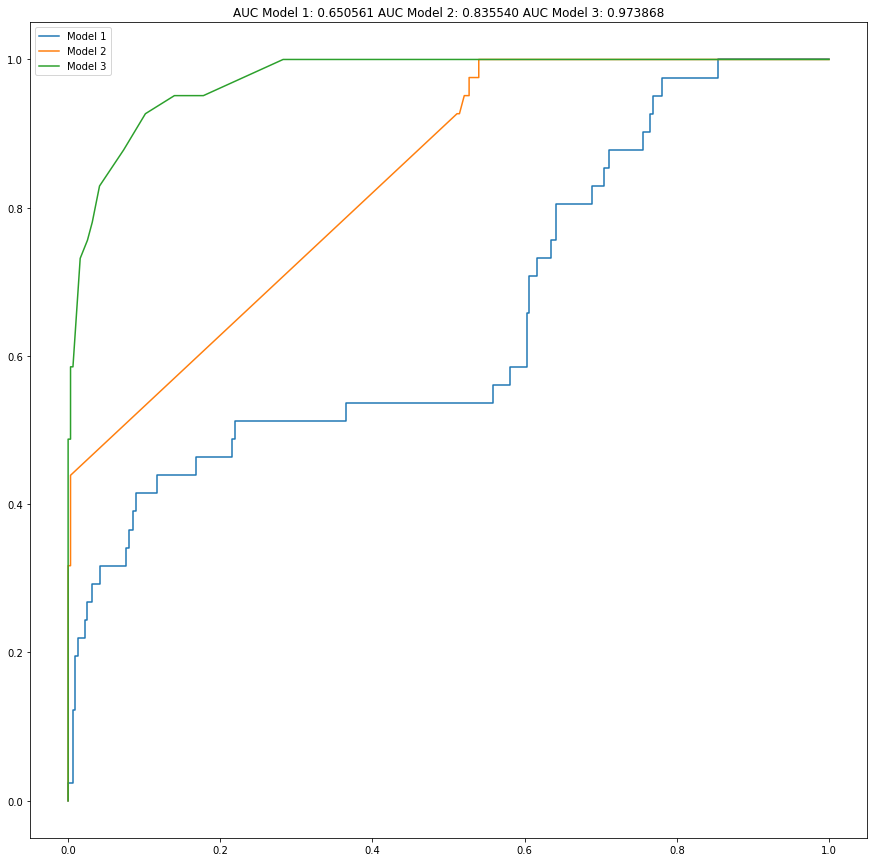

In [21]:
#Roc Plot
plotMetricsCompare(X_test,y_test,clsA,clsB,clsC)